In [1]:
import pandas as pd 
import numpy as np 

import matplotlib.pyplot as plt 

from skimage import io
from skimage.viewer import ImageViewer

import os

from conv_autoencoder import ConvAutoencoder

In [2]:
import tensorflow as tf 
from tensorflow.keras.preprocessing.image import load_img, img_to_array

In [3]:
DATA_FOLDER = 'data/img_align_celeba/img_align_celeba'



In [4]:
images = os.listdir(DATA_FOLDER)
N_IMAGES = len(images)
N_IMAGES

3953

In [5]:
img = io.imread(DATA_FOLDER + '/000002.jpg')
img.shape
#viewer = ImageViewer(img)
#viewer.show()

(218, 178, 3)

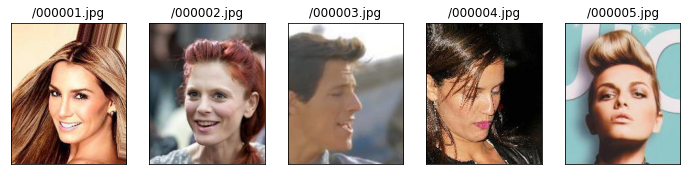

In [6]:
fig, ax = plt.subplots(1,5, figsize=(12, 12)) 

for i, axis in enumerate(ax):
    img = io.imread(DATA_FOLDER + f'/00000{i+1}.jpg')
    axis.set_xticks([])
    axis.set_yticks([])
    axis.set_title(f'/00000{i+1}.jpg')
    axis.imshow(img)

In [7]:
def get_data(data_folder):
    X = np.empty(shape=(N_IMAGES, 128, 128, 3), dtype="float32")

    for i, file in enumerate(images):
        img = img_to_array(load_img(DATA_FOLDER + '/' + file, target_size=(128, 128, 1), color_mode="rgb")).astype('float32')
        X[i] = img
    
    #X = np.array(X).astype('float32')
    X = X / 255
    
    return X
data = get_data(DATA_FOLDER[:10])
data.shape

(3953, 128, 128, 3)

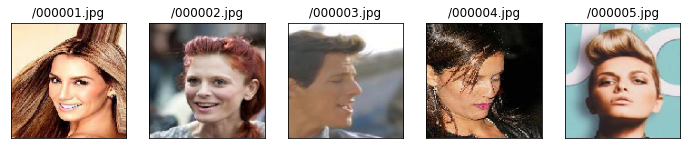

In [8]:
fig, ax = plt.subplots(1,5, figsize=(12, 12)) 

for i, axis in enumerate(ax):
    img = data[i]
    axis.set_xticks([])
    axis.set_yticks([])
    axis.set_title(f'/00000{i+1}.jpg')
    axis.imshow(img)

In [11]:
model = ConvAutoencoder(input_shape=(128, 128, 3), filter_sizes=[32, 16, 8], kernel_size=(2, 2), output_channels=3, skip_last_padding=False, resize_layer=True)

Model: "model_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_2 (InputLayer)         [(None, 128, 128, 3)]     0         
_________________________________________________________________
conv2d_7 (Conv2D)            (None, 128, 128, 32)      416       
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 64, 64, 32)        0         
_________________________________________________________________
conv2d_8 (Conv2D)            (None, 64, 64, 16)        2064      
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 32, 32, 16)        0         
_________________________________________________________________
conv2d_9 (Conv2D)            (None, 32, 32, 8)         520       
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 16, 16, 8)         0   

In [10]:
model.fit(data, epochs=2, batch_size=128)

ValueError: A target array with shape (3953, 128, 128, 3) was passed for an output of shape (None, 126, 126, 3) while using as loss `binary_crossentropy`. This loss expects targets to have the same shape as the output.